In [5]:
# Shashi Bhushan
# MSDS DSC 540, Fall 2022
# Milestone 5: Merging the Data and Storing in a Database/Visualizing Data

In [6]:
#Flat file dataframe creation
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df_csv = pd.read_csv('patients_data.csv', low_memory=False)
df_csv.columns = df_csv.columns.map(lambda x : x.replace(" ", "_"))
df_csv.drop(labels=['Patient_Number', 'Estimated_Onset_Date', 'Source_1', 'Source_2', 'Source_3', 'Entry_ID'], axis=1, inplace=True)
df_csv = df_csv.replace(r'^s*$', float('NaN'), regex = True)
df_csv.dropna(subset = ['Age_Bracket', 'Gender', 'Detected_State'], inplace = True)
df_csv.drop(df_csv.index[df_csv['Detected_State'] == 'State Unassigned'], inplace=True)
df_csv=df_csv.astype({'Detected_State' : 'string'})
df_csv=df_csv.astype({'State_code' : 'string'})
df_csv["State_code"] = df_csv.groupby("Detected_State")["State_code"].apply(lambda x: x.ffill().bfill())

In [7]:
df_csv

,State_Patient_Number,Date_Announced,Age_Bracket,Gender,Detected_City,Detected_District,Detected_State,State_code,Current_Status,Notes,Contracted_from_which_Patient_(Suspected),Nationality,Type_of_transmission,Status_Change_Date,Backup_Notes,Num_Cases
0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,Student from Wuhan,1.0
3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,Recovered,"Travelled from Austria, Italy",NaN,India,Imported,15/03/2020,Travel history to Italy and Austria,1.0
4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,TG,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",NaN,India,Imported,02/03/2020,"Travel history to Dubai, Singapore contact",1.0
5,NaN,03/03/2020,69,M,Jaipur,Italians,Rajasthan,RJ,Recovered,Travelled from Italy,NaN,Italy,Imported,03/03/2020,Italian tourist,1.0
20,NaN,04/03/2020,70,F,Jaipur,Italians,Rajasthan,RJ,Recovered,"Travelled from Italy, Wife of P6",P6,Italy,Imported,04/03/2020,Italian tourist (wife of P6),1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246708,KA-P160285,06/08/2020,58,F,NaN,Davanagere,Karnataka,KA,Deceased,"SARI;Fever, Breathlessness;HTN;05-08-2020;05-0...",NaN,NaN,NaN,NaN,NaN,1.0
246709,KA-P160691,06/08/2020,69,M,NaN,Davanagere,Karnataka,KA,Deceased,"SARI;Fever, Breathlessness;HTN;05-08-2020;05-0...",NaN,NaN,NaN,NaN,NaN,1.0
246710,KA-P162167,06/08/2020,80,F,NaN,Hassan,Karnataka,KA,Deceased,"SARI;Fever, Breathlessness;HTN;Brought dead on...",NaN,NaN,NaN,NaN,NaN,1.0
246711,KA-P162537,06/08/2020,52,M,NaN,Belagavi,Karnataka,KA,Deceased,SARI;Breathlessness;-;04-08-2020;05-08-2020 at...,NaN,NaN,NaN,NaN,NaN,1.0


In [8]:
df_csv_new = df_csv.groupby(['State_code','Date_Announced'])['Gender'].agg('count').reset_index()
df_csv_new['Date_Announced'] = pd.to_datetime(df_csv_new.Date_Announced)
df_csv_new=df_csv_new.rename(columns={'Gender':'Count'})
df_csv_new

,State_code,Date_Announced,Count
0,AN,2020-03-27,1
1,AP,2020-01-04,63
2,AP,2020-02-04,17
3,AP,2020-04-04,7
4,AP,2020-05-04,62
...,...,...,...
885,WB,2020-03-27,5
886,WB,2020-03-28,3
887,WB,2020-03-29,2
888,WB,2020-03-30,1


In [9]:
# html dataframe creation
import requests
base_site = 'https://www.indiacensus.net/literacy-rate.php'
r = requests.get(base_site)
df = pd.read_html(r.text)
Literacy_df = df[0]
Literacy_df = Literacy_df.iloc[:-1, :]
Literacy_df.columns = Literacy_df.columns.map(lambda x : x.replace(" ", "_"))
Literacy_df.drop(labels=['S.No.'], axis=1, inplace=True)
Literacy_df=Literacy_df.astype({'Population' : 'int32'})
Literacy_df=Literacy_df.astype({'Literates' : 'int32'})
Literacy_df['Literacy'] = Literacy_df['Literacy'].str.rstrip('%').astype('float') /100.0

In [10]:
state_site = 'https://kb.bullseyelocations.com/article/60-india-state-codes'
r = requests.get(state_site)
df_state = pd.read_html(r.text)
state_codes = df_state[0]
state_codes.drop(index=state_codes.index[0], axis=0, inplace=True)
state_codes.columns = ['Name', 'Code', 'Alt_Code']
state_codes = state_codes.rename(index = lambda x: x - 1)
Literacy_df['State_code'] = state_codes['Code']

In [11]:
Literacy_df

,State_Name,Population,Literates,Literacy,State_code
0,Andaman & Nicobar Islands,380581,294281,0.8663,AN
1,Andhra Pradesh,84580777,50556760,0.6702,AP
2,Arunachal Pradesh,1383727,766005,0.6538,AR
3,Assam,31205576,19177977,0.7219,AS
4,Bihar,104099452,52504553,0.6180,BR
5,Chandigarh,1055450,805438,0.8605,CH
6,Chhattisgarh,25545198,15379922,0.7028,CT
7,Dadra and Nagar Haveli,343709,223230,0.7624,DN
8,Daman and Diu,243247,188406,0.8710,DD
9,Delhi,16787941,12737767,0.8621,DL


In [12]:
# API JSON data to dataframe
import json
response = requests.get("https://api.covid19india.org/v4/min/timeseries.min.json")
data=response.json()
def flatten_dict(nested_dict):
    res = {}
    if isinstance(nested_dict, dict):
        for k in nested_dict:
            flattened_dict = flatten_dict(nested_dict[k])
            for key, val in flattened_dict.items():
                key = list(key)
                key.insert(0, k)
                res[tuple(key)] = val
    else:
        res[()] = nested_dict
    return res
temp_dict=flatten_dict(data)
df = pd.DataFrame.from_dict(temp_dict, orient="index")
df.index = pd.MultiIndex.from_tuples(df.index)
df = df.unstack(level=-1)
df.columns = df.columns.map("{0[1]}".format)
final_df=df.reset_index()
final_df.drop(labels=['level_1','other'],axis=1, inplace=True)
final_df.rename(columns={'level_0':'State_code','level_2':'Date','level_3':'Data_Type'},inplace = True)
final_df['confirmed']=final_df['confirmed'].fillna(0)
final_df['deceased']=final_df['deceased'].fillna(0)
final_df['recovered']=final_df['recovered'].fillna(0)
final_df['tested']=final_df['tested'].fillna(0)
final_df['vaccinated1']=final_df['vaccinated1'].fillna(0)
final_df['vaccinated2']=final_df['vaccinated2'].fillna(0)
final_df=final_df.dropna(axis=0, how="all")
final_df_total=final_df[final_df.Data_Type == 'total']
final_df_total.drop(labels=['Data_Type'],axis=1, inplace=True)
final_df_total['Date'] = pd.to_datetime(final_df_total.Date)

In [13]:
final_df_total.tail(100)

,State_code,Date,confirmed,deceased,recovered,tested,vaccinated1,vaccinated2
64202,WB,2021-07-24,1522833.0,18064.0,1492878.0,15428549.0,19487580.0,8194575.0
64205,WB,2021-07-25,1523639.0,18073.0,1493770.0,15478602.0,19549648.0,8210268.0
64208,WB,2021-07-26,1524296.0,18085.0,1494645.0,15510885.0,19763014.0,8302952.0
64211,WB,2021-07-27,1524958.0,18095.0,1495483.0,15553998.0,19957376.0,8376243.0
64214,WB,2021-07-28,1525773.0,18109.0,1496294.0,15599120.0,20136326.0,8461201.0
...,...,...,...,...,...,...,...,...
64487,WB,2021-10-27,1589042.0,19096.0,1561973.0,19039301.0,53992006.0,20590859.0
64490,WB,2021-10-28,1590032.0,19105.0,1562818.0,19084738.0,54524323.0,20878857.0
64493,WB,2021-10-29,1591014.0,19113.0,1563678.0,19133755.0,55226050.0,21196433.0
64496,WB,2021-10-30,1591994.0,19126.0,1564558.0,19180886.0,55982557.0,21500866.0


In [14]:
# exporting dataframe to SQLite
import sqlite3

In [15]:
conn = sqlite3.connect('covid_data.db')

In [16]:
df_csv_new.to_sql("CSV", conn, if_exists='replace')

890

In [17]:
Literacy_df.to_sql("Literacy", conn, if_exists='replace')

36

In [18]:
final_df_total.to_sql("Total", conn, if_exists='replace')

21677

In [19]:
# Create cursor object
cursor = conn.cursor()

In [20]:
# Joining three tables together
sql = '''CREATE TABLE Merged_Table AS SELECT CSV.[State_code], Date_Announced, Count, Literacy, confirmed, deceased, recovered, tested, vaccinated1, vaccinated2
FROM CSV
INNER JOIN Literacy
ON CSV.State_code=Literacy.State_code
INNER JOIN Total
ON CSV.State_code=Total.State_code
AND
CSV.Date_Announced=Total.Date;'''

In [21]:
cursor.execute(sql)

In [26]:
conn.commit()

In [27]:
df=pd.read_sql_query("SELECT * from Merged_Table", conn)

In [28]:
df

,State_code,Date_Announced,Count,Literacy,confirmed,deceased,recovered,tested,vaccinated1,vaccinated2
0,AN,2020-03-27 00:00:00,1,0.8663,6.0,0.0,0.0,0.0,0.0,0.0
1,AP,2020-04-04 00:00:00,7,0.6702,192.0,1.0,2.0,1800.0,0.0,0.0
2,AP,2020-05-04 00:00:00,62,0.6702,1650.0,33.0,524.0,125229.0,0.0,0.0
3,AP,2020-06-04 00:00:00,45,0.6702,4112.0,71.0,2529.0,413733.0,0.0,0.0
4,AP,2020-07-04 00:00:00,11,0.6702,17699.0,218.0,8008.0,996573.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
795,WB,2020-03-27 00:00:00,5,0.7626,15.0,0.0,0.0,0.0,0.0,0.0
796,WB,2020-03-28 00:00:00,3,0.7626,18.0,0.0,0.0,0.0,0.0,0.0
797,WB,2020-03-29 00:00:00,2,0.7626,21.0,1.0,0.0,0.0,0.0,0.0
798,WB,2020-03-30 00:00:00,1,0.7626,22.0,2.0,0.0,0.0,0.0,0.0


In [63]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'count of cases on a day vs literacy in that state')

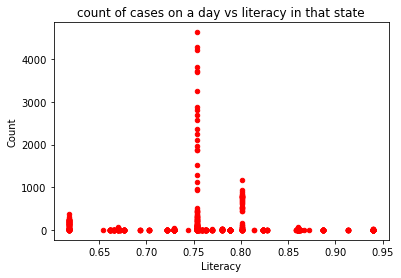

In [64]:
# Data from CSV and html
df.plot(kind='scatter', x='Literacy',y='Count',color='red')
plt.title("count of cases on a day vs literacy in that state")

Text(0.5, 1.0, 'Literacy Vs Tested')

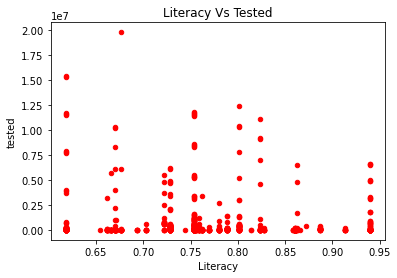

In [65]:
#Data from html and JSON
df.plot(kind='scatter', x='Literacy',y='tested',color='red')
plt.title("Literacy Vs Tested")

Text(0.5, 1.0, 'Tested Vs Confirmed')

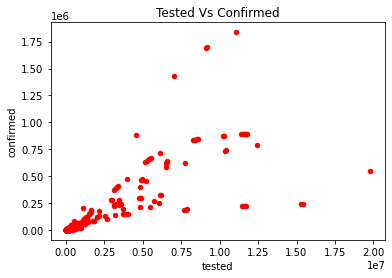

In [66]:
# data from JSON
df.plot(kind='scatter', x='tested',y='confirmed',color='red')
plt.title("Tested Vs Confirmed")

Text(0.5, 1.0, 'Tested Vs Deceased')

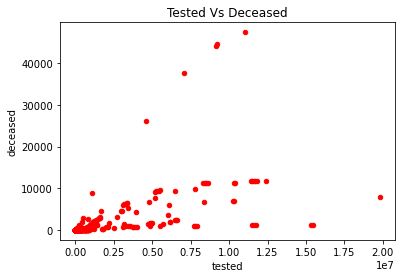

In [67]:
# data from JSON
df.plot(kind='scatter', x='tested',y='deceased',color='red')
plt.title("Tested Vs Deceased")

Text(0.5, 1.0, 'Tested Vs Recovered')

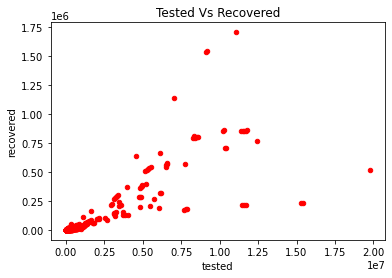

In [68]:
# data from JSON
df.plot(kind='scatter', x='tested',y='recovered',color='red')
plt.title("Tested Vs Recovered")

In [1]:
'''
The project endeavored to detect the progression of covid cases in India in 2020 and find if there is a correlation 
between literacy percentages in the states or lack of it in each of the states. In addition, I also tried to explore
if that number of tests contributed to decrease in the spread of the virus vis-a-vis tracking recovery or resulting 
in reduction of number of people deceased assuming was early enough to receive treatment.

Primary data wrangling included removing rows and columns either having no data or irrelevant data, changing column 
names for consistency in identification, removing redundant columns, changing data types, creating new data frames 
storing data to be used in the analysis. There are no manipulation of data that was done to influence the outcome of the 
analysis. Therefore,I do not see any ethical implications in the steps I have completed associated with the datasource.

The most difficult lesson that was learnt and which will serve well in future projects is that it will help to spend
more time upfront and devise a step-wise objective for the milestones otherwise one would be scrambling to complete 
the steps. 

From the technical standpoint, dealing with multi-level json data was a nightmare and I was able to convert it into 
a dataframe by first converting into a dictionary of tuples and then stacking into a data frame.
From the scatterplots that I created, I see that states with 75%-85% literacy tested in maximum numbers and data from
the other data source also confirmed that number of cases were higher in those literacy ranges; thereby indicating 
that the more the people tested, more cases were confirmed. There appears to be a direct correlation between the
number of people tested and number of confirmed cases. We can also see that as the number of tests increased,
number of deceased people showed a decreasing trend; thereby indicating effectiveness of testing. In addition,
the more the people tested, it indicated increase in recovery. Therefore, it does show that number of tests 
definitely helped in the recovery process from covid. Whereas, relationship with Literacy needs to be explored
more in order to come-up with a firm conclusion.

'''

'\nThe project endeavored to detect the progression of covid cases in India in 2020 and find if there is a correlation \nbetween literacy percentages in the states or lack of it in each of the states. In addition, I also tried to explore\nif that number of tests contributed to decrease in the spread of the virus vis-a-vis tracking recovery or resulting \nin reduction of number of people deceased assuming was early enough to receive treatment.\n\nPrimary data wrangling included removing rows and columns either having no data or irrelevant data, changing column \nnames for consistency in identification, removing redundant columns, changing data types, creating new data frames \nstoring data to be used in the analysis. There are no manipulation of data that was done to influence the outcome of the \nanalysis. Therefore,I do not see any ethical implications in the steps I have completed associated with the datasource.\n\nThe most difficult lesson that was learnt and which will serve well i